<a href="https://colab.research.google.com/github/bertokawa/dsnp_1_airbnb_tokyo/blob/master/Analysis_Airbnb_Data_from_Tokyo_(Japan).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 in *Data Science na Pratica***
*by Humberto Cavamura ([Github](https://github.com/bertokawa)*)

---

# **Analysing Data from Airbnb - *Tokyo (JAPAN)***

<center><img alt=\"letras-ciudad-tokio\" width=\"10%\" src=z"/content/sample_data/3225888.jpg\"></center>
<center><a href=z"http://www.freepik.comz">Designed by Freepik</a></center>

![texto alternativo](https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg)

One of the biggest startups in the world, the [Airbnb](https://www.airbnb.com/) changed the hotel industry with new concepts like share economy and the disruptive innovation. It created a digital platform that connects people who need a place to stay for a few nights and those who have it. So, without owning a single accomodation, Airbnb share many kinds of places like single room, entire apartaments for a more reasonable price.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

With the massive expansion of the Airbnb, another independent inniciative began to growth, is called [Inside Airbnb](http://insideairbnb.com/). It has been offering some data in internet to people see how Airbnb is present in the cities and how it might affecting this sector. There is a rivalry between them, Inside Airbnb is questioning the benefits of the Airbnb, but talking about this issue is not the objetive of this project.

Here will be dedicated in analysing data from the Inside Airbnb about Tokyo(Japan) and see the insights it can bring. The Japan's capital is receiving more and more tourist along the years, to know it's tradional and modern culture. 



Another thing thius can be a little help to the reader check how Tokyo is  is beacuse this city was going to be the host of the Olympic Games and the Paraolympic Games in 2020. However beacuse of the covid-19 pandemic this event was delayed to the middle of 2021. So this project will show some analysis how are the accomodations, in the Airbnb's point of view. In the end, it can maybe help the reader to choose Tokyo as a travel detiny or light a flame to want to see this event.


## **First steps - Data acquisition**

### **Introduction**

The tool used in here was Python languge and the following package:

In [1]:
import pandas as pd;
import matplotlib.pyplot as plt;
import seaborn as sns;

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


To starting analysing the was chosen the file [listings.csv](http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-05-30/visualisations/listings.csv) from the site [Get the Data - Inside Airbnb](http://insideairbnb.com/get-the-data.html). This file was chosen due the file is more compact but it have enough data to use.

In [2]:
df = pd.read_csv ("http://data.insideairbnb.com/japan/kant%C5%8D/tokyo/2020-05-30/visualisations/listings.csv")

### **About the file**

Let's show inside the file and how the variables and values are organized.

In [3]:
print ("{} inputs of data.".format(df.shape[0]))
print ("{} variables.".format(df.shape[1]))

15009 inputs of data.
16 variables.


In [4]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

It can be a little confusing seen the data as shown as above, but here a little description:

* id - ID number of the place
* name - name given to the place
* host_id - ID number of the host
* host_name - name of the host
* neighbourhood_group - a column without data
* neighbourhood - name of the neighbourhood
* latitude - latitude of the place
* longitude - longitude of the place
* room_type - type of the place
* price - price to rent
* minimum_nights - minimum nights to stay
* number_of_reviews - the number of reviews received
* last_review - when was the last review
* reviews_per_month - mean of the review per month
* calculated_host_listings_count - how many places the host has
* availability_365 - how many days the place is available in 365 days

### **Example of the table**

The first five inputs from the file, to see if the table need some adjustings.

In [5]:
df.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,35303,"La Casa Gaienmae C Harajuku, Omotesando is nearby",151977,Miyuki,NaN,Shibuya Ku,35.67152,139.71203,Private room,4192,28,18,2018-07-28,0.18,3,89
1,197677,Oshiage Holiday Apartment,964081,Yoshimi & Marek,NaN,Sumida Ku,35.71721,139.82596,Entire home/apt,10965,3,165,2020-03-04,1.56,1,270
2,289597,Private apt in central Tokyo #203,341577,Hide&Kei,NaN,Nerima Ku,35.74267,139.65810,Entire home/apt,4192,28,113,2020-02-17,1.17,2,242
3,370759,"Cozy flat #203, local area YET 10 mins to shib...",1573631,"Gilles,Mayumi,Taiki",NaN,Setagaya Ku,35.66443,139.65707,Entire home/apt,6987,28,103,2020-04-16,1.37,3,364
4,700253,Private apt in central Tokyo #201,341577,Hide&Kei,NaN,Nerima Ku,35.74264,139.65832,Entire home/apt,3977,28,104,2020-05-12,1.12,2,353


### **Adjusting the table**

An important fact observed in this database was the price. It's using japanese currecy, JPY (Japan Yen), but for easier analysis is necessary to convert to USD (US Dollars).

This exchange currecy was on June 18 2020.

$$
1 (USD) = 106.920 (JPY)
$$



In [6]:
df_backup = df.copy()
df['price'] = df['price'] / 106.92

Next step is checking in the table for NULL values:

In [7]:
df.isnull().sum().sort_values (ascending = False) / df.shape[0] * 100

neighbourhood_group               100.000000
reviews_per_month                  17.609434
last_review                        17.609434
host_name                           0.046639
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_id                             0.000000
name                                0.000000
id                                  0.000000
dtype: float64

As shown above, the variable *Neighbourhood_column* has all input as Null, so this it will be dropped from the table.

Also *review_per_month* and *last_review* and *host_name* have some nulls too, but this won't be deal still.


In [8]:
df.drop ('neighbourhood_group', axis = 1, inplace = True)

## **Next step - Analysing RAW DATA**


This step is for checking the varaibles and bringing some information.

### **Starting analysing the data**

Using some statistical operations will help to find some insights.

In [9]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,1.500900e+04,1.500900e+04,15009.000000,15009.000000,15009.000000,15009.000000,15009.000000,12366.000000,15009.000000,15009.000000
mean,3.171782e+07,1.704263e+08,35.694697,139.734775,254.694677,3.418149,26.529482,1.565028,13.563262,151.573789
std,9.436473e+06,1.005129e+08,0.143989,0.081667,736.921972,9.251353,40.767312,1.297347,16.145016,119.080421
min,3.530300e+04,1.519770e+05,27.072330,139.123190,0.000000,1.000000,0.000000,0.020000,1.000000,0.000000
25%,2.651004e+07,7.061679e+07,35.685800,139.699340,65.347924,1.000000,2.000000,0.600000,3.000000,55.000000
50%,3.344028e+07,1.857782e+08,35.702810,139.728020,111.597456,1.000000,11.000000,1.360000,8.000000,145.000000
75%,3.967955e+07,2.529105e+08,35.724600,139.784810,187.008979,2.000000,34.000000,2.240000,18.000000,246.000000
max,4.357856e+07,3.469412e+08,35.832430,142.202880,9971.324355,365.000000,529.000000,40.080000,95.000000,365.000000


In a first impression, some variables is showing a strange behaviour: 

* *price* - the maximun value is a way higher than the mean, almost four times. Also 75% of the data is too lower than the maximun. So maybe therer are few places having a exborting values compared to others and interfering in the analysis.

* *minimun_nights* - this variable has a problema similar from the *price*. A issue is rent a place for a minimum night like a year, it's is very strange since the Aribnb is used more to rent for a few days like a weekend.

* *latitude* - there is a difference about 8º lat in the minimum value and the mean. This difference is almost 850km in real world, this is almost de distance from Tokyo (Japan) to Hiroshima (Japan).

* *longitude* - there is a difference about 3º long, it can be almost 300km extension.

* *reviews_per_month* - there an maximun value of 40.08, but if this place is rent all days in the year it should be close to 30, even if all user write a review.

These points with strange values are called outliers. It can be some exceptions or even a error.

### **Deeper analysis on each variable listed above**

Let's start visualize the data distribution with histograms.

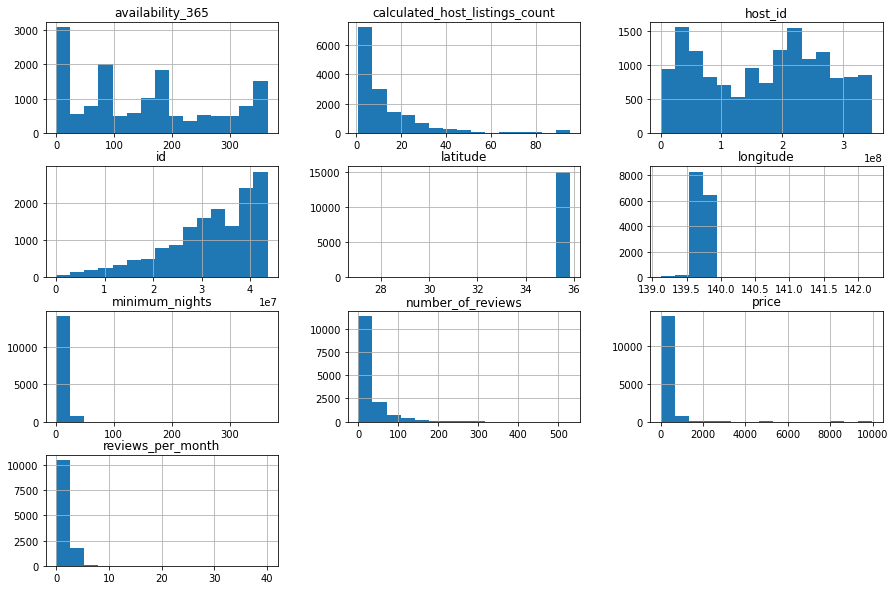

In [10]:
df.hist (bins = 15, figsize = (15,10));

As said before, some variale are showing some inconsistence. 
* A large concetration of number below USD 1000,00, almost zero above this limit.
* *minimum_nights* - high concetration below 5 days. Above this day apperaring to be almost zero.
* *latitude* - a concentration of coordinates in 35º lat, but it shows a few below at 28º lat.

#### **Let's begin with *PRICE***


Let's visualize these outliers, with a graffic called Boxplot.


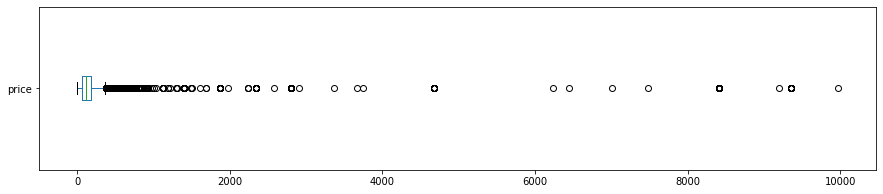

price: value over than 270:
2692 entradas
17.935905%


In [11]:
df.price.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("price: value over than 270:")
print ("{} entradas".format(len(df[df.price > 270])))
print ("{:4%}".format((len(df[df.price > 270])/df.shape[0])))

The dots are the outliers. They are going to be removed from the table to get easier the analyses.

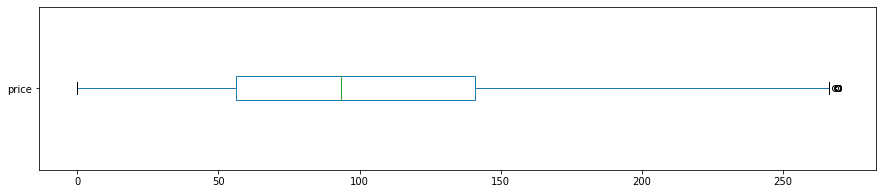

In [12]:
df_price = df.copy()

df_price.drop (df_price[df_price.price > 270].index, axis = 0, inplace = True)

df_price.price.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

df_v2 = df_price.copy()

Using *USD 270,00*, get easier to see that most place to rent is  between 50,00 USD to 150,00 USD.

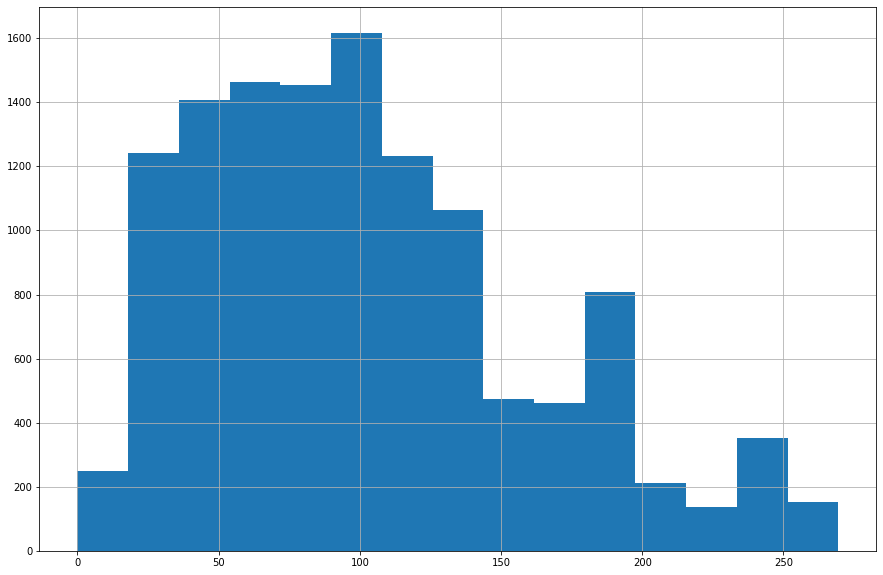

In [13]:
df_price.price.hist (bins = 15, figsize = (15,10));

Using histograms again to price, the main value is almost simliar from the boxplot.

In [14]:
df_price [['price']].describe()

,price
count,12317.000000
mean,101.491324
std,58.386721
min,0.000000
25%,56.303779
50%,93.499813
75%,140.759446
max,269.453797


After the removing the ouliers, the statistical values make more sense. Price have a high concetration between USD 50,00 to USC 150,00. 

#### **Second variable is *minimum_nights***

Again starting with a boxplot:

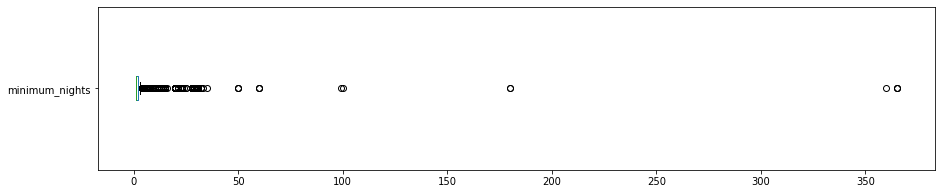

Value below than 7:
1364 entradas
9.087881%


In [15]:
df_nights = df.copy()
df_nights.minimum_nights.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("Value below than 7:")
print ("{} entradas".format(len(df_nights[df_nights.minimum_nights > 4])))
print ("{:4%}".format((len(df_nights[df_nights.minimum_nights > 4])/df_nights.shape[0])))

Again the ouliers is show above, there isn't so many, less than 10% when value is above 4 days.

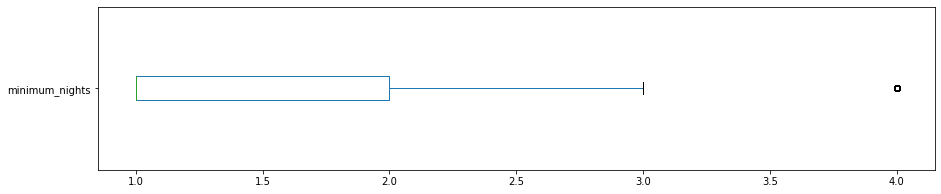

In [16]:
df_nights.drop (df_nights[df_nights.minimum_nights > 4].index, axis = 0, inplace = True)
df_v2.drop (df_nights[df_nights.minimum_nights > 4].index, axis = 0, inplace = True)
df_nights.minimum_nights.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

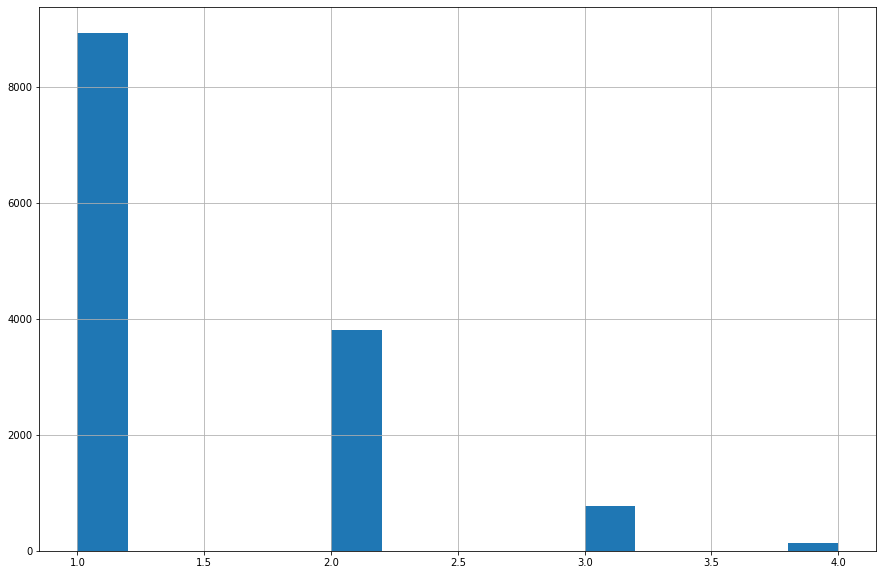

In [17]:
df_nights.minimum_nights.hist(bins=15, figsize = (15,10));

The boxplot without many outliers.



In [18]:
df_nights [['minimum_nights']].describe()

,minimum_nights
count,13645.000000
mean,1.421107
std,0.643070
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


Os dados mostram que a maior parte do hosts oferecem pelo menos um dia. Isso pode acompanhar mais o tipo de cidade que é ofercer mais para trabalhadores que estão de viagem. Tokyo é uma cidade empresarial e sede de algumas empresas, é uma cidade que recebe trabalahdores por isso.

So the data show that, many hosts prefere to offer at least 1 night. It can be little odd sometimes, because normally the host may prefere 2 night instead, to ensure the visitant stay a while weekend, beacuse if they stay 1 day, may be difficult to rent the other day.

However, it can be beacuse Tokyo is majority a city business ciy, so majority of the visitors are workers, who is in the town to a reunion or just passing by. 

Since a years ago, that tourism in Tokyo is inscreaing. In 2010 is stimated 8.611.175 visitor overseas visits japan but in 2019 the number increased to 31.882.049 visitors. (Data from [JBT Tourism Reaserach & Consulting Co](https://www.tourism.jp/en/tourism-database/stats/inbound/)).


#### **Coordinates - Latitude & Longitude**

Search for outliers in coordinates, a few difference in this variable make a huge change in position in the world. 

Using the coordinates to plot a scatter map, will help to see how spread the points are.

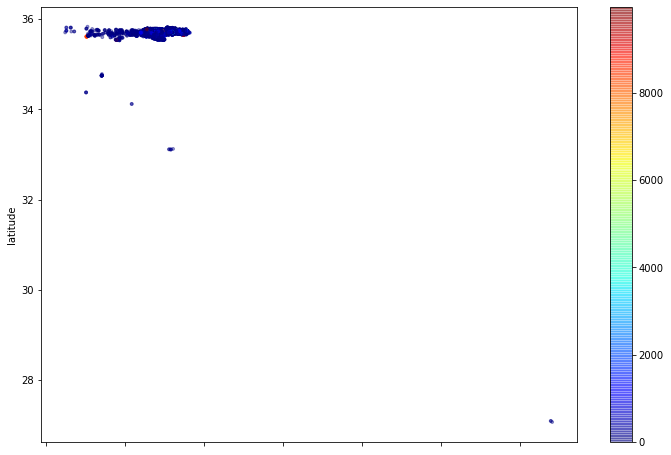

In [19]:
df.plot (
    kind='scatter', 
    x = 'longitude', 
    y = 'latitude', 
    alpha = 0.4,
    c = df['price'],
    s = 8,
    cmap = plt.get_cmap ('jet'),
    figsize = (12, 8)
    );

There some point very far from the concetration, so choosing lat 35 as a limit and long 140 to remove the points far away.

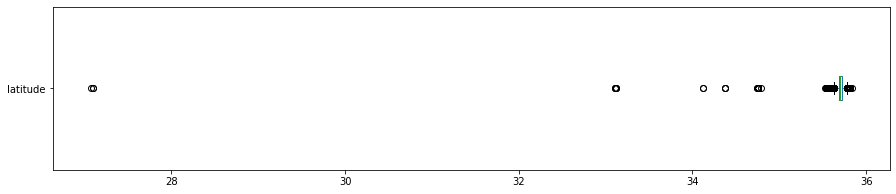

latitude: value under than 35:
29 entradas
0.193217%


In [20]:
df.latitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("latitude: value under than 35:")
print ("{} entradas".format(len(df[df.latitude < 35])))
print ("{:4%}".format((len(df[df.latitude < 35])/df.shape[0])))

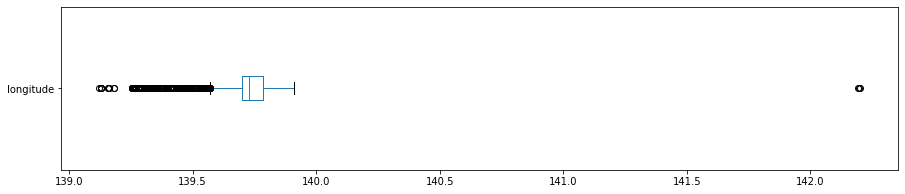

longitude: value over than 140:
3 entradas
0.019988%


In [21]:
df.longitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

print ("longitude: value over than 140:")
print ("{} entradas".format(len(df[df.longitude > 140])))
print ("{:4%}".format((len(df[df.longitude > 140])/df.shape[0])))

So, as the boxplots above, ther a few value the a commom range. To how there affect, let plot with python.

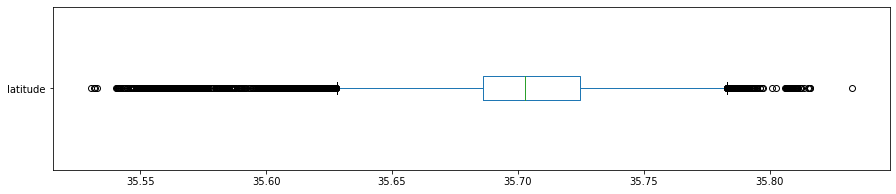

In [22]:
df_coord = df.copy()

df_coord.drop (df_coord[df_coord.latitude < 35.5].index, axis = 0, inplace = True)

df_v2.drop (df_v2[df_v2.latitude < 35.5].index, axis = 0, inplace = True)

df_coord.latitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

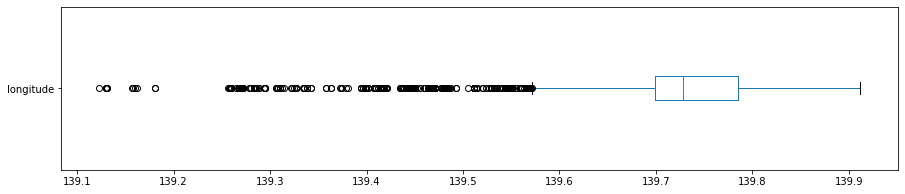

In [23]:
df_coord.drop (df_coord[df_coord.longitude > 140].index, axis = 0, inplace = True)

df_v2.drop (df_v2[df_v2.longitude > 140].index, axis = 0, inplace = True)

df_coord.longitude.plot (kind = 'box', vert = False, figsize = (15,3))
plt.show()

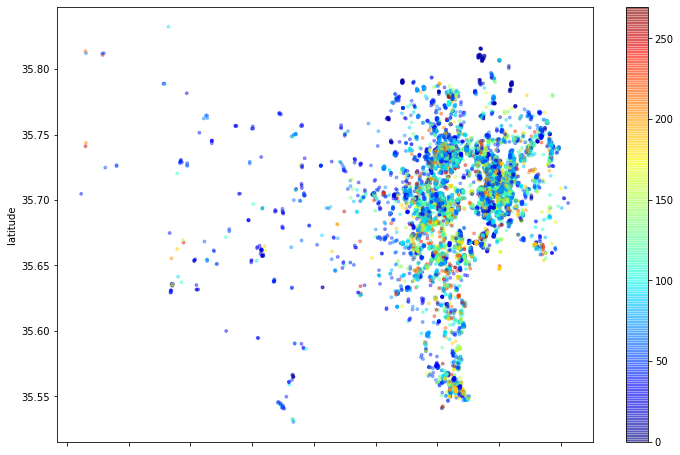

In [24]:
df_v2.plot (
    kind='scatter', 
    x = 'longitude', 
    y = 'latitude', 
    alpha = 0.4,
    c = df_v2['price'],
    s = 8,
    cmap = plt.get_cmap ('jet'),
    figsize = (12, 8)
    );

After removing those points, we scatter is similiar to Tokyo city.

To complete this section, find thorugh a deep search in the database the outliers points.

In [25]:
long = df[df['longitude'] > 140].neighbourhood.value_counts()
print (long)

Ogasawara Mura    3
Name: neighbourhood, dtype: int64


In [26]:
lat = df[df['latitude'] < 35.5].neighbourhood.value_counts()
print (lat)

Oshima Machi      15
Hachijo Machi      6
Ogasawara Mura     3
Niijima Mura       3
Miyake Mura        2
Name: neighbourhood, dtype: int64


In [27]:
df.drop (df[df.latitude > 35.5].index, axis = 0, inplace = True)
df.groupby("neighbourhood")['price'].mean()

neighbourhood
Hachijo Machi      93.669722
Miyake Mura       140.254396
Niijima Mura       93.499813
Ogasawara Mura     72.053872
Oshima Machi       77.952363
Name: price, dtype: float64

After searching through the internet, Tokyo has some islands. Different from the capital, theses places are an escape from the citie to a more natural place.

* Oshima - approximattaly 100km from the capital. A famous spot is there a active vulcan.
* To-shima - about 150 km from the capital. A island with crystal water to see scuba diving and see the fauna.
* Niijima - approx 163 km. Beatifual beache with white sand. A small island with big wave, ideal for surfers
* Kouzushima - 190 km. in ceter of the island, Mt. Tenjo has 574m tall, people goes for a hike. Akasaki Promenade, a tturistic point to near a bay, to diving and surfers.
* Miyake - 190 km. A island once had sulfuric gases flown through the earth, because some old eruptions. As consireder safe in 2005, but gas mask is a must carry. With all of this fauna or flora survived and a place a unique bird pygmy woodpeckers. given the nickname as Bird Island, for bird-watchers.
* Mikurajima - distance about 200m. Whole island is a natianl park. There is a small tourism, but small places is prohibited because of protection to the wildlife.
* Hachijo - approximatily 290 km from Tokyo. Another island with natural wonder, beaches, diving sptos, a mount with *onsen* on the slope (hot springs). many kinds of animals
* Aogashima - almost 370 km. A very inacessible island, the geogical structure, made only easy access through a local service. appro 160 habitants this place is very to escape from the city. This is aplace ideal for starazing
* Ogasawara - distance about 1000 km from Tokyo. This is an archipelago with two main island (Hahajima and Chichijima). With a unique flora and fauna most untouched. A place to relaxe and rousirm with nature, swimming, hiking, diving.

<center><img alt="edge" width="20%" src="https://github.com/bertokawa/dsnp_1_airbnb_tokyo/blob/images/images/hayato-shin-zcKuJ3YJFmw-unsplash.jpg?raw=true"></center>
<center><span>Photo by <a href="https://unsplash.com/@hytshin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Hayato Shin</a> on <a href="/s/photos/tokyo-islands?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>


### **Correlation**

Next step is the *Correlation*, this means if there are dependencies between them and how each of them is related. In Seaborn package is possible to visualize the correlation.

In [28]:
corr = df_v2 [[
              'price',
              'minimum_nights',
              'number_of_reviews',
              'reviews_per_month',
              'latitude',
              'longitude',
              'calculated_host_listings_count',
              'availability_365'
              ]
].corr()

display (corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,latitude,longitude,calculated_host_listings_count,availability_365
price,1.000000,-0.078388,-0.024652,0.070761,-0.092424,0.063150,-0.126827,0.026504
minimum_nights,-0.078388,1.000000,-0.031986,-0.111499,0.014975,-0.035897,0.135189,0.035874
number_of_reviews,-0.024652,-0.031986,1.000000,0.717656,-0.054774,-0.047962,-0.157988,0.045509
reviews_per_month,0.070761,-0.111499,0.717656,1.000000,-0.064619,-0.006896,-0.147624,0.039937
latitude,-0.092424,0.014975,-0.054774,-0.064619,1.000000,0.195377,0.108547,-0.011245
longitude,0.063150,-0.035897,-0.047962,-0.006896,0.195377,1.000000,0.048879,0.001386
calculated_host_listings_count,-0.126827,0.135189,-0.157988,-0.147624,0.108547,0.048879,1.000000,0.001827
availability_365,0.026504,0.035874,0.045509,0.039937,-0.011245,0.001386,0.001827,1.000000


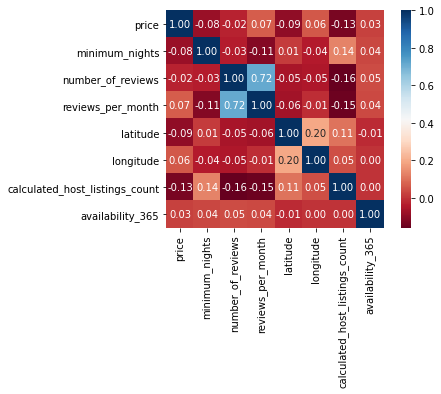

In [29]:
# plotar um heatmap a partir das correlações
sns.heatmap (corr, cmap = 'RdBu', fmt = '.2f', square = True, linecolor = 'white', annot = True);

The heatmap shows that almost all variables don't have any correlation, showing values near zero. With exception the *reviews_per_month* and *number_of_reviews*, one is consquency from the other.

### **Place to stay**

#### **Type of the room**

The hosts in the Airbnb can offer many kinds of places, like a individual room, shared room, entire house ot apartment.

So the distribution in Tokyo is:

Entire home/apt    7952
Private room       3089
Shared room         668
Hotel room          579
Name: room_type, dtype: int64


Entire home/apt    64.713542
Private room       25.138346
Shared room         5.436198
Hotel room          4.711914
Name: room_type, dtype: float64




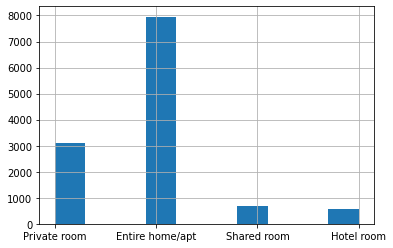

In [30]:
type_place = df_v2['room_type'].value_counts()
print (type_place)
print("\n")

type_place_p = type_place / df_v2.shape[0] * 100
print (type_place_p)
print("\n")

df_v2.room_type.hist();

#### **And the neighbourhood**



Checking the neighbourhood for some conslusion.

First, price:

In [31]:
df_v2.groupby(['neighbourhood']).price.mean().sort_values(ascending = False) [:5]

neighbourhood
Hinohara Mura    137.778245
Shibuya Ku       121.046134
Okutama Machi    120.274972
Minato Ku        117.990821
Mitaka Shi       113.007233
Name: price, dtype: float64

In [32]:
print ("Hinohara Mura:{}".format(df_v2[df_v2.neighbourhood == 'Hinohara Mura'].shape[0]))
print ("Shibuya Ku:{}".format(df_v2[df_v2.neighbourhood == 'Shibuya Ku'].shape[0]))
print ("Okutama Machi:{}".format(df_v2[df_v2.neighbourhood == 'Okutama Machi'].shape[0]))
print ("Minato Ku:{}".format(df_v2[df_v2.neighbourhood == 'Minato Ku'].shape[0]))
print ("Mitaka Shi:{}".format(df_v2[df_v2.neighbourhood == 'Mitaka Shi'].shape[0]))

Hinohara Mura:4
Shibuya Ku:847
Okutama Machi:5
Minato Ku:458
Mitaka Shi:15


Above, three neightbourhood, *Hinohara Mura*, *Okutama Machi*, *Mitaka Shi*, appears with high prices but with low number of places. So, it's not possible to be sure how expensive they are.

So they places call attetions are *Shibuya Ku* and *Minato Ku*. 

To complete the information, see how many places there are spread through the neighbourhood.

In [33]:
df_v2.neighbourhood.value_counts().sort_values(ascending = False)[:5]

Shinjuku Ku    2242
Taito Ku       1583
Toshima Ku     1347
Sumida Ku      1064
Shibuya Ku      847
Name: neighbourhood, dtype: int64

With the above steps, four heighbourhood call for attention:

Checking this four neighbourhood:
* Shibuya Ku: is one of the most modern places in Tokyo, aimed at young people. We have establishments such as shopping malls and bars aimed at this audience. One of the most famous spots is the Shibuya Crossing, the largest intersection in the world.

<center><img alt="Shibuya Ku" width="10%" src="/content/images/6183.jpg"></center>
<center><a href='https://www.freepik.com/free-photos-vectors/business'>Business photo created by mrsiraphol - www.freepik.com</a></center>

* Shinjuku Ku: another modern part of the capital, many neon lights, skyscrappers, electronics stores, night foods and bar is an options here. Like shibuya is ideal fpor topurist to know.

<center><img alt="Shinjuku" width="10%" src="/content/images/gilly-_EBOeN3XBOM-unsplash.jpg"></center>
<center><span>Photo by <a href="https://unsplash.com/@gillyberlin?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Gilly</a> on <a href="/s/photos/tokyo-metropolitan-government?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>


* Minato Ku: is one of the most internecioal areas, Many companuies establish headquarters there, they have a estabelecimentos voltados para atender melhor um estranheiro. Tokyo Tower is a famous touristc point, it was a antenna based on Eiffel Tower, used for telecomunicação also we received many torusit, it's base have a some museum and restaurnt.


<center><img alt="Analisando Airbnb" width="15%" src="/content/images/2448.jpg"></center>
<center><a href="http://www.freepik.com">Designed by lifeforstock / Freepik</a></center>



* Taito Ku: is more known for the tradicioanl japanese culture, with old shrines and temples, there some museum to learn the culture. On of the famous spot is the Ueno Park, where is Tokyo National Museum is situated and having one of the famous place to see Sakura we is blossom.

<center><img alt="Analisando Airbnb" width="15%" src="/content/images/dlkr-life-NKqBP5dJ8uY-unsplash.jpg"></center>
<center><span>Photo by <a href="https://unsplash.com/@dlkrlife?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">DLKR Life</a> on <a href="/s/photos/ueno-park?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span></center>

As said before, Tokyo will be will COI event in 2021. Most of the games will be at the japan's capital. 

It was divided in two sector, Heritage Zone and Bay Zone The Heritage Zone is West side from central area, you can rent a place like Shibuya to be next to the event, for other choose the Minntao it is near from the bay,

https://www.google.com/maps/d/viewer?mid=18C3uYS-fRGhZ5ybNFT_31OKE87A&ll=35.64845551138853%2C139.82345925609908&z=12
https://www.2020games.metro.tokyo.lg.jp/eng/taikaijyunbi/taikai/map/detail_map/index.html

## Conclusions

With the of the project is possible to see that Tokyo is city with different styles of atictivities. This is a cities with modern caracterisitc like skycrappers, malls and new foods. Also you can see the tradicional and ancient culture from japan, tradicional food, ancient temple and shrines. If you want to escape the routine from the city is possible to escape and visit natural spot, like the island landscape, with beach, ocean, mountains for hiking.

A few insights with this projects, is Tokyo offers accomodation mostly from USD 50,00 to USC 150,00

Pelos dados, ainda foi possivel observar que Tokyo uma distribuição, 


With the end of this project, it can show that Tokyo can be a very modern citis with skyscrappers, as atividades though the night, but is possible to see a more tradicional culture, or even naturals places

Continue with the duality, it is a place for business, many places offering a bed for minimum a day to the worker travelings but the tourism is increasing in the city

In the databse picked in Iside Airbnb, there were many Outliers in many varaible, like in prices, minimum nights, but what called for attetions, was the coordinates. With this shows that Toky doesn't offere only a place in the main island, also in small village in *alto mar* fot peacefl place to stay. Like the Ogasawara Island.

To the ending, this was the first project in Data Science, it broght a challegen because not only showed some basics from the area area, but also it make do a research to find why the information was behave like that.
